# 1.3 Análise Bivariada

**Projeto:** Ligia Group Challenge 2026  
**Autor:** Grupo 17  
**Fase CRISP-DM:** Data Understanding  
**Objetivo:** Analisar relações entre pares de variáveis

## Importação de Bibliotecas

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

## Carregamento dos Dados

In [5]:
data_path = Path('../data/raw/Cardiovascular_Disease_Dataset.csv')
df = pd.read_csv(data_path)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Dataset: {df.shape[0]} linhas x {df.shape[1]} colunas")

Dataset: 1000 linhas x 14 colunas


## Matriz de Correlação

In [6]:
correlation_matrix = df[numeric_cols].corr()
correlation_matrix

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
patientid,1.000000,0.004978,-0.031263,-0.009679,-0.020926,0.053464,0.022331,-0.003667,-0.036486,0.014338,-0.013825,-0.010128,0.019465,-0.005637
age,0.004978,1.000000,-0.024717,0.037731,-0.016126,0.035439,0.049732,0.067736,-0.040092,-0.037581,-0.026020,-0.015334,0.025407,0.008356
gender,-0.031263,-0.024717,1.000000,0.035402,-0.069727,-0.120759,0.023560,-0.046634,0.064606,-0.051746,0.331457,-0.051957,0.029376,0.015769
chestpain,-0.009679,0.037731,0.035402,1.000000,0.222267,0.174731,0.232059,0.256316,0.114496,-0.027376,0.101345,0.472731,0.285156,0.554228
restingBP,-0.020926,-0.016126,-0.069727,0.222267,1.000000,0.126523,0.192063,0.219887,0.095569,-0.046545,-0.004225,0.376711,0.263194,0.482387
serumcholestrol,0.053464,0.035439,-0.120759,0.174731,0.126523,1.000000,0.278337,0.101767,0.038967,0.029422,-0.025910,0.165569,0.132419,0.195340
fastingbloodsugar,0.022331,0.049732,0.023560,0.232059,0.192063,0.278337,1.000000,0.143982,0.096528,0.011356,0.015311,0.242734,0.182246,0.303233
restingrelectro,-0.003667,0.067736,-0.046634,0.256316,0.219887,0.101767,0.143982,1.000000,0.099991,-0.032489,0.040291,0.343280,0.204684,0.426837
maxheartrate,-0.036486,-0.040092,0.064606,0.114496,0.095569,0.038967,0.096528,0.099991,1.000000,0.015536,0.044614,0.201515,0.122763,0.228343
exerciseangia,0.014338,-0.037581,-0.051746,-0.027376,-0.046545,0.029422,0.011356,-0.032489,0.015536,1.000000,-0.003296,-0.017783,-0.017513,-0.039874


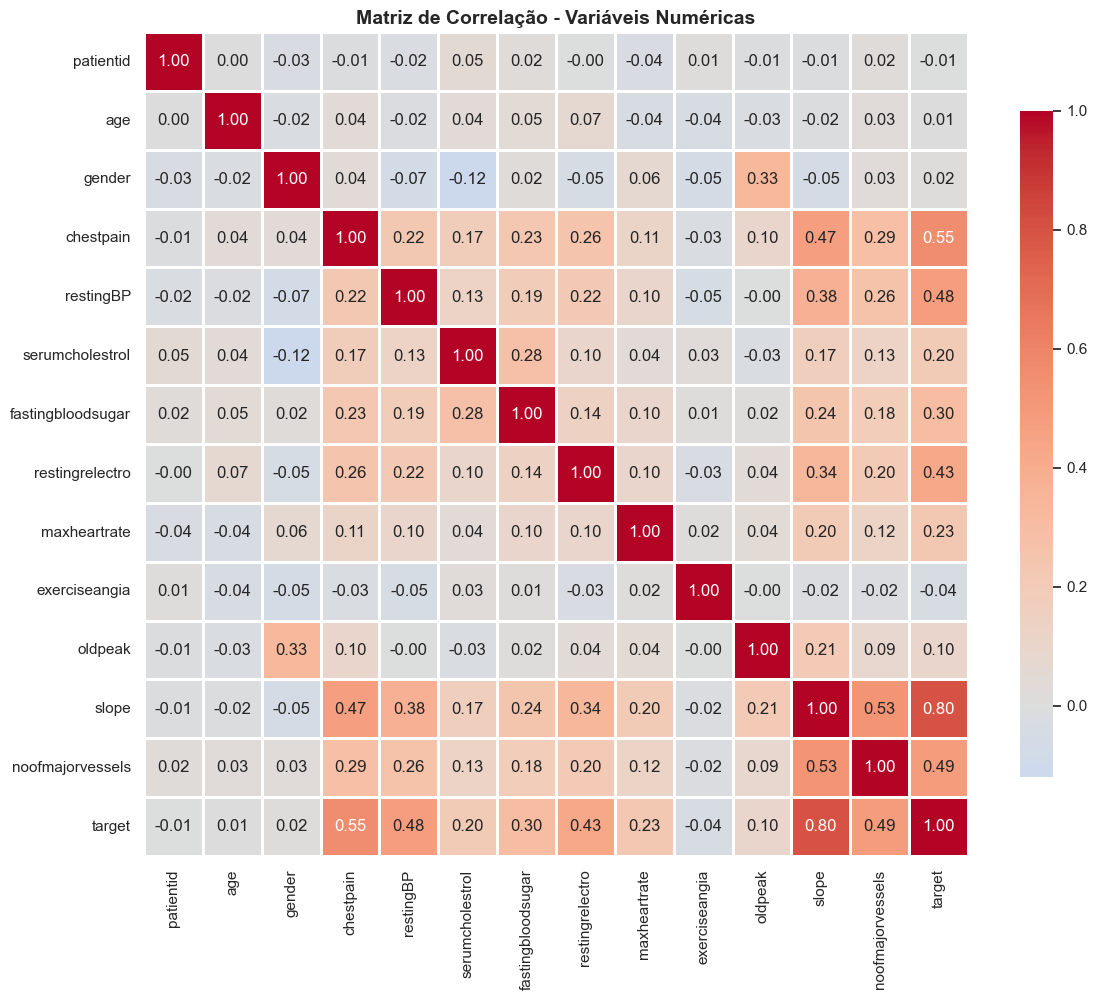

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [8]:
correlations_abs = correlation_matrix.abs().unstack()
correlations_sorted = correlations_abs.sort_values(ascending=False)
correlations_unique = correlations_sorted[correlations_sorted < 1]

print("Top 10 Correlações:")
print(correlations_unique.head(10))

Top 10 Correlações:
slope             target              0.797358
target            slope               0.797358
                  chestpain           0.554228
chestpain         target              0.554228
noofmajorvessels  slope               0.526536
slope             noofmajorvessels    0.526536
noofmajorvessels  target              0.489866
target            noofmajorvessels    0.489866
                  restingBP           0.482387
restingBP         target              0.482387
dtype: float64
